# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [144]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [145]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [146]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [147]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [148]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [149]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [150]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [61]:
print(df["sales_channel"].shape)
print(df["num_passengers"].shape)
print(df["purchase_lead"].shape)
print(df["length_of_stay"].shape)
print(df["flight_hour"].shape)
print(df["flight_day"].shape)
print(df["wants_extra_baggage"].shape)
print(df["wants_preferred_seat"].shape)
print(df["wants_in_flight_meals"].shape)
print(df["flight_duration"].shape)
print(df["trip_type"].shape)
print(df["route"].shape)
print(df["booking_origin"].shape)
print(df["booking_complete"].shape)

(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)
(50000,)


In [58]:
df["sales_channel"].value_counts().shape
df["sales_channel"].shape

(50000,)

In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [152]:
x = le.fit_transform(df["sales_channel"])

In [153]:
df["sales_channel"] = x

In [154]:
df["trip_type"].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [155]:
x1 = le.fit_transform(df["trip_type"])

In [156]:
df["trip_type"] = x1

In [157]:
df["trip_type"].value_counts()

2    49497
1      387
0      116
Name: trip_type, dtype: int64

In [25]:
df


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,2,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,2,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,0,2,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,0,2,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [27]:
df["route"].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [30]:
df["booking_origin"].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int32  
 2   trip_type              50000 non-null  int32  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int32(2), int64(9), object(2)
memory us

In [52]:
df["booking_complete"].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

<AxesSubplot:xlabel='num_passengers', ylabel='Density'>

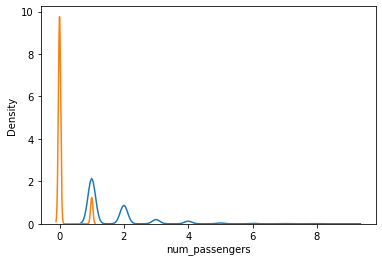

In [158]:
import seaborn as sns
sns.kdeplot(df["num_passengers"])
sns.kdeplot(df["sales_channel"])

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [161]:
sc_df = sc.fit_transform(x)

<AxesSubplot:>

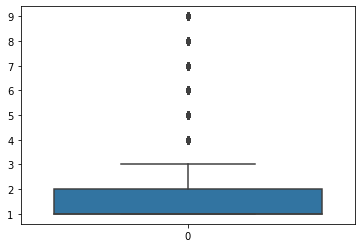

In [204]:
sns.boxplot(df["num_passengers"])

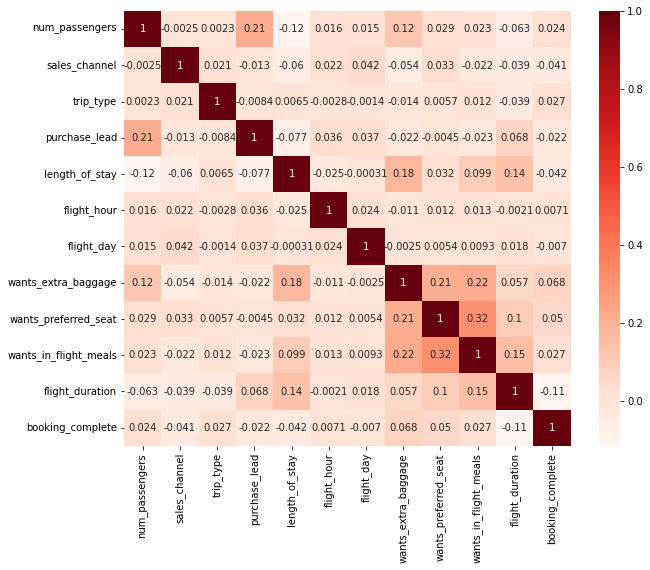

In [260]:
corr = df.corr()
import matplotlib.pyplot as plt
#plt.matshow(df.corr())
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap="Reds",annot=True)
plt.savefig("Corr.png")
plt.show()

# s =corr.style.background_gradient(cmap="coolwarm")

In [160]:
x = df.drop(["booking_complete","route","booking_origin"],axis=1)
y =df["booking_complete"]
y.shape
x.shape

(50000, 11)

In [162]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [164]:
model = rf_clf.fit(x_train,y_train)

In [165]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [166]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [167]:
print("Without Hyperparameter")
accuracy_train = accuracy_score(y_train,y_train_pred)
print("Accuracy train :",accuracy_train)
accuracy_test = accuracy_score(y_test,y_test_pred)
print("accuracy_test :",accuracy_test)
con_metrix_test = confusion_matrix(y_test,y_test_pred)
print("con_metrix_test:\n",con_metrix_test)
clf_report_test = classification_report(y_test,y_test_pred)
print("Clf_report \n",clf_report_test)

Without Hyperparameter
Accuracy train : 0.99965
accuracy_test : 0.8477
con_metrix_test:
 [[8389  121]
 [1402   88]]
Clf_report 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8510
           1       0.42      0.06      0.10      1490

    accuracy                           0.85     10000
   macro avg       0.64      0.52      0.51     10000
weighted avg       0.79      0.85      0.80     10000



In [196]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
smt =SMOTE(random_state=10)
x,y = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=10,stratify=y)

In [197]:
import numpy as np
hyperparameters = { 
    'n_estimators':np.arange(70,120),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,10),
    'min_samples_split':np.arange(2,15),
    'min_samples_leaf':np.arange(1,8),
    'random_state':[10],
}
rf_clf_hyp = RandomizedSearchCV(rf_clf,hyperparameters,cv=5)

In [198]:
model_hyp_t = rf_clf_hyp.fit(x_train,y_train)
model_hyp_t.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=9, n_estimators=114, random_state=10)

In [199]:
model_hyp = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=9, n_estimators=114, random_state=10)
model_hyp.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=9, n_estimators=114, random_state=10)

In [200]:
y_train_pred_hyp = model_hyp.predict(x_train)
y_test_pred_hyp = model_hyp.predict(x_test)

In [201]:
print("With Hyperparameter and sampling")
accuracy_train_hyp = accuracy_score(y_train,y_train_pred_hyp)
print("Accuracy train :",accuracy_train_hyp)
accuracy_test_hyp = accuracy_score(y_test,y_test_pred_hyp)
print("accuracy_test :",accuracy_test_hyp)
con_metrix_test_hyp = confusion_matrix(y_test,y_test_pred_hyp)
print("con_metrix_test:\n",con_metrix_test_hyp)
clf_report_test_hyp = classification_report(y_test,y_test_pred_hyp)
print("Clf_report \n",clf_report_test_hyp)

With Hyperparameter
Accuracy train : 0.7380806798049637
accuracy_test : 0.7350077606885848
con_metrix_test:
 [[7249 3381]
 [2253 8378]]
Clf_report 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72     10630
           1       0.71      0.79      0.75     10631

    accuracy                           0.74     21261
   macro avg       0.74      0.74      0.73     21261
weighted avg       0.74      0.74      0.73     21261



In [217]:
from xgboost import XGBClassifier
xgc = XGBClassifier()

In [226]:
hyperparameters = { 
    'n_estimators':np.arange(70,120),
    'max_depth':np.arange(1,10),
    'gamma':np.arange(0.0,1.0),
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30,0.35]
}
xgc_hyp = RandomizedSearchCV(xgc,hyperparameters,cv=5)

In [227]:
xgc_model_hyp = xgc_hyp.fit(x_train,y_train)
xgc_model_hyp.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=106, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [231]:
xgc_model_hyp =XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=106, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,)
xgc_model_hyp.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=106, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [232]:
xgc_y_train_pred_hyp = xgc_model_hyp.predict(x_train)
xgc_y_test_pred_hyp = xgc_model_hyp.predict(x_test)

In [233]:
print("With Hyperparameter and sampling")
xgc_accuracy_train_hyp = accuracy_score(y_train,xgc_y_train_pred_hyp)
print("Accuracy train :",xgc_accuracy_train_hyp)
xgc_accuracy_test_hyp = accuracy_score(y_test,xgc_y_test_pred_hyp)
print("accuracy_test :",xgc_accuracy_test_hyp)
xgc_con_metrix_test_hyp = confusion_matrix(y_test,xgc_y_test_pred_hyp)
print("con_metrix_test:\n",xgc_con_metrix_test_hyp)
xgc_clf_report_test_hyp = classification_report(y_test,xgc_y_test_pred_hyp)
print("Clf_report \n",xgc_clf_report_test_hyp)

With Hyperparameter and sampling
Accuracy train : 0.9265478262232884
accuracy_test : 0.8694322938714077
con_metrix_test:
 [[9905  725]
 [2051 8580]]
Clf_report 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     10630
           1       0.92      0.81      0.86     10631

    accuracy                           0.87     21261
   macro avg       0.88      0.87      0.87     21261
weighted avg       0.88      0.87      0.87     21261



<AxesSubplot:>

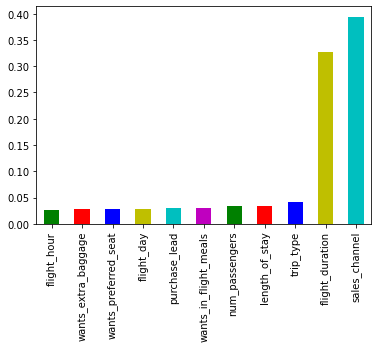

In [262]:
f_imp = pd.Series(xgc_model_hyp.feature_importances_,index=x.columns)
f_imp.nsmallest(11).plot(kind="bar",color=['g','r','b','y','c','m',])

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.